### The code required to create Figure 1, merger time vs gravitational period as a function of blackhole separation.

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter

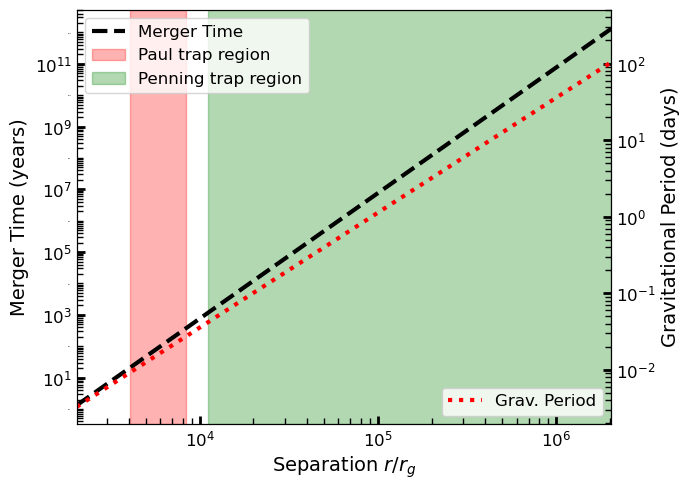

In [2]:
# Functions
def calculate_merger_time(m1, m2, separation_meters):
    c = 3e8
    G = 6.67430e-11
    T_merge = (5 / 256) * (c**5 / G**3) * (
        separation_meters**4 / (m1 * m2 * (m1 + m2))
    )
    return T_merge / (60 * 60 * 24 * 365.25)

def calculate_period_grav(M=2e30, G=6.6743e-11, b=1.5e10):
    omega_grav = np.sqrt(G * M / (4 * b**3))
    return 2 * np.pi / omega_grav

# Constants
M_sun = 1.98847e30
M_bh = 50 * M_sun
r_g = (6.67430e-11 * M_bh) / (3e8**2)
AU = 1.5e11

# Data: separations from 0.001 AU to 1 AU
test_distances = AU * np.logspace(-3, 0, 500)
x = (test_distances / r_g)  # in units of r/r_g

# Compute times
merger_times = calculate_merger_time(M_bh, M_bh, test_distances)
grav_periods_days = calculate_period_grav(M=M_bh, b=test_distances) / (3600 * 24)

# Region boundaries
paul_min = (2e-3 * AU / r_g)
paul_max = (4.1e-3 * AU / r_g)
penning_max = (5.5e-3 * AU / r_g)
axis_xmax = (1 * AU / r_g)  # up to 1 AU

# Create plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, merger_times, lw=3, color='k', ls='--', label='Merger Time')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(x.min(), axis_xmax)
ax.set_xlabel(r'Separation $r/r_g$', fontsize=14)
ax.set_ylabel('Merger Time (years)', fontsize=14)

# Shaded regions
ax.axvspan(paul_min, paul_max, color='r', alpha=0.3, label='Paul trap region')
ax.axvspan(penning_max, axis_xmax, color='g', alpha=0.3, label='Penning trap region')

# Y-axis: major ticks at decades, minor ticks at each factor of 10
ax.yaxis.set_major_locator(LogLocator(base=10))
ax.yaxis.set_minor_locator(LogLocator(base=10, subs=np.arange(1, 10), numticks=100))
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: rf'$10^{{{int(np.log10(v))}}}$'))

# Style ticks: show minor tick marks without labels
ax.tick_params(axis='y', which='major', labelsize=12, direction='in', length=6, width=2)
ax.tick_params(axis='y', which='minor', labelsize=0, direction='in', length=4, width=1)
ax.tick_params(axis='x', which='major', labelsize=12, direction='in', length=6, width=2)
ax.tick_params(axis='x', which='minor', direction='in', length=4, width=1)

# Twin axis for gravitational period
ax2 = ax.twinx()
ax2.plot(x, grav_periods_days, lw=3, color='r', ls=':', label='Grav. Period')
ax2.set_yscale('log')
ax2.set_ylabel('Gravitational Period (days)', fontsize=14)
ax2.set_ylim(top=500)

# Right y-axis ticks: same pattern
ax2.yaxis.set_major_locator(LogLocator(base=10))
ax2.yaxis.set_minor_locator(LogLocator(base=10, subs=np.arange(1, 10), numticks=100))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: rf'$10^{{{int(np.log10(v))}}}$'))
ax2.tick_params(axis='y', which='major', labelsize=12, direction='in', length=6, width=2)
ax2.tick_params(axis='y', which='minor', labelsize=0, direction='in', length=4, width=1)

# Legends
ax.legend(loc='upper left', fontsize=12)
ax2.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.savefig('black_hole_merger_rg_right_vert_adjusted_1AU_0905.pdf', bbox_inches='tight')
plt.show()
